In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
os.listdir()

['.git',
 '.ipynb_checkpoints',
 'avg_sess_month.jpg',
 'avg_sess_month.png',
 'avg_sess_quarter.jpg',
 'bounceMonthly.jpg',
 'bounceQuarterly.jpg',
 'channelRev.jpg',
 'channelRev24.jpg',
 'Channels.jpg',
 'Channels24.jpg',
 'conversionMonthly.jpg',
 'conversionQuarterly.jpg',
 'Final_data_analytics.csv',
 'GA.csv',
 'GoogleAnalytics.ipynb',
 'LICENSE',
 'monthly_sess.png',
 'monthly_sess1.png',
 'pageViews.jpg',
 'Pageviews24.jpg',
 'quarterlySess.jpg',
 'quarterlySess1.jpg',
 'README.md',
 'rev.jpg',
 'revDaily.jpg',
 'revMonth.jpg',
 'revQuart.jpg',
 'revQuarter.jpg',
 'RevSess.jpg',
 'RevSess1.jpg',
 'RevSess42.jpg',
 'sessions.jpg',
 'timeViews.jpg',
 'views_per_sess42.jpg',
 'yearlySess.jpg']

In [3]:
df=pd.read_csv('Final_data_analytics.csv')

In [18]:
df

,date,Sessions,Page_Views,New_Visitors,Hits,Time_onsite(minutes),bounces_offsite,Revenue(Rs/.),Total_Revenues,is_direct,is_mobile,Session_qual,Avg_session_duration(minutes),Bounce_Rate(%age),Conversion_Rate(%age),Channel,day,year,month
0,2020-08-01,1,4,1,7,2,0,0.0,0.0,0,0,0,2,0.00,0.0,Organic Search,1,2020,8
1,2020-08-01,1,13,1,5,10,0,1699.0,2399.0,0,0,0,10,0.00,100.0,Organic Search,1,2020,8
2,2020-08-01,1,2,1,7,1,0,0.0,0.0,0,1,0,1,0.00,0.0,Direct,1,2020,8
3,2020-08-01,1,5,1,16,6,0,0.0,0.0,1,0,0,6,0.00,0.0,Social,1,2020,8
4,2020-08-01,1,3,1,3,1,0,0.0,0.0,0,0,0,1,0.00,0.0,Organic Search,1,2020,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,2021-07-31,1,1,1,1,2,1,0.0,0.0,0,1,0,2,0.75,0.0,Direct,31,2021,7
55496,2021-07-31,2,1,0,1,2,1,0.0,0.0,1,1,0,1,0.75,0.0,Organic Search,31,2021,7
55497,2021-07-31,7,1,0,1,2,1,0.0,0.0,1,1,0,1,0.75,0.0,Direct,31,2021,7
55498,2021-07-31,1,29,1,1,58,0,5599.0,5999.0,0,0,0,58,0.00,100.0,Organic Search,31,2021,7


In [4]:
df['date']=pd.to_datetime(df['date'])

In [5]:
df['day']=df.date.apply(lambda x:x.day)
df['year']=df.date.apply(lambda x:x.year)
df['month']=df.date.apply(lambda x:x.month)

In [6]:
df_20=df[df['year']==2020]
df_21=df[df['year']==2021]

In [59]:
df_num=df_20.groupby('month')['Sessions'].sum()/1000
df_num

month
8     12.623
9     12.785
10    11.738
11    11.045
12    11.126
Name: Sessions, dtype: float64

In [60]:
df_21.groupby('month')['Sessions'].sum()/1000

month
1    11.634
2     8.204
3     9.886
4    12.511
5    10.276
6    10.656
7    10.572
Name: Sessions, dtype: float64

In [29]:
(sum(df_20.groupby('month')['Sessions'].sum().values) +sum(df_21.groupby('month')['Sessions'].sum().values))/12

11088.0

In [17]:
def month_name(month):
    names = {
        1: 'January',
        2: 'February',
        3: 'March',
        4: 'April',
        5: 'May',
        6: 'June',
        7: 'July',
        8: 'August',
        9: 'September',
        10: 'October',
        11: 'November',
        12: 'December',
    }
    return names[month] 

In [20]:
df_21.month.apply(lambda x:month_name(x)).unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July'],
      dtype=object)

In [34]:
sum(df_21.groupby('month')['Hits'].sum().values)/7

13680.285714285714

In [39]:
(sum(df_21.groupby('month')['Conversion_Rate(%age)'].mean().values)+sum(df_20.groupby('month')['Conversion_Rate(%age)'].mean().values))/12

0.28536720530507126

In [48]:
df_21.groupby('Channel')['Hits'].sum()/95762

Channel
(Other)           0.000470
0                 0.000052
Affiliates        0.020321
Direct            0.195787
Display           0.007393
Organic Search    0.626908
Paid Search       0.031046
Referral          0.091414
Social            0.026608
Name: Hits, dtype: float64

In [69]:
df_21['Page_Views'].sum()

92605

In [70]:
df_21['New_Visitors'].sum()

25256

In [78]:
df_21['Bounce_Rate(%age)'].mean()

0.5259257229831916

In [79]:
df_21

,date,Sessions,Page_Views,New_Visitors,Hits,Time_onsite(minutes),bounces_offsite,Revenue(Rs/.),Total_Revenues,is_direct,is_mobile,Session_qual,Avg_session_duration(minutes),Bounce_Rate(%age),Conversion_Rate(%age),Channel,year,month
22650,2021-01-01,1,1,1,1,2,1,0.0,0.0,0,0,0,2,1.00,0.0,Direct,2021,1
22651,2021-01-01,1,1,1,1,2,1,0.0,0.0,0,0,0,2,1.00,0.0,Direct,2021,1
22652,2021-01-01,12,1,0,1,2,1,0.0,0.0,1,0,0,1,1.00,0.0,Direct,2021,1
22653,2021-01-01,1,1,1,1,2,1,0.0,0.0,0,0,0,2,1.00,0.0,Organic Search,2021,1
22654,2021-01-01,1,1,1,1,2,1,0.0,0.0,0,0,0,2,1.00,0.0,Paid Search,2021,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,2021-07-31,1,1,1,1,2,1,0.0,0.0,0,1,0,2,0.75,0.0,Direct,2021,7
55496,2021-07-31,2,1,0,1,2,1,0.0,0.0,1,1,0,1,0.75,0.0,Organic Search,2021,7
55497,2021-07-31,7,1,0,1,2,1,0.0,0.0,1,1,0,1,0.75,0.0,Direct,2021,7
55498,2021-07-31,1,29,1,1,58,0,5599.0,5999.0,0,0,0,58,0.00,100.0,Organic Search,2021,7


In [80]:
os.listdir()

['.git',
 '.ipynb_checkpoints',
 'Final_data_analytics.csv',
 'GA.csv',
 'LICENSE',
 'README.md',
 'Untitled.ipynb']

In [86]:
df['date']=pd.to_datetime(df['date'])

In [90]:
from datetime import date
import calendar
my_date = date.today()
df['day_of_week']=df['date'].apply(lambda x: calendar.day_name[x.weekday()])

In [94]:
df[df['New_Visitors']==1]

,date,Sessions,Page_Views,New_Visitors,Hits,Time_onsite(minutes),bounces_offsite,Revenue(Rs/.),Total_Revenues,is_direct,...,Session_qual,Avg_session_duration(minutes),Bounce_Rate(%age),Conversion_Rate(%age),Channel,geoLoc,year,month,day,day_of_week
0,2020-08-01,1,4,1,0.019934,2,0,0.0,0.000000,0,...,0,2,0.00,0.0,Organic Search,Mumbai,2020,8,1,Saturday
1,2020-08-01,1,13,1,0.013289,10,0,1699.0,7.783224,0,...,0,10,0.00,100.0,Organic Search,Bangalore,2020,8,1,Saturday
2,2020-08-01,1,2,1,0.019934,1,0,0.0,0.000000,0,...,0,1,0.00,0.0,Direct,Hyderabad,2020,8,1,Saturday
3,2020-08-01,1,5,1,0.049834,6,0,0.0,0.000000,1,...,0,6,0.00,0.0,Social,Bangalore,2020,8,1,Saturday
4,2020-08-01,1,3,1,0.006645,1,0,0.0,0.000000,0,...,0,1,0.00,0.0,Organic Search,Hyderabad,2020,8,1,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55491,2021-07-31,1,3,1,0.000000,1,0,0.0,0.000000,0,...,0,1,0.00,0.0,Organic Search,Delhi,2021,7,31,Saturday
55492,2021-07-31,1,1,1,0.000000,2,1,0.0,0.000000,0,...,0,2,0.75,0.0,Organic Search,Hyderabad,2021,7,31,Saturday
55493,2021-07-31,1,1,1,0.000000,2,1,0.0,0.000000,1,...,0,2,0.75,0.0,Organic Search,Hyderabad,2021,7,31,Saturday
55495,2021-07-31,1,1,1,0.000000,2,1,0.0,0.000000,0,...,0,2,0.75,0.0,Direct,Bangalore,2021,7,31,Saturday


In [111]:
df.loc[(df['New_Visitors']==0)&(df['Channel']=='Organic Search')]

,date,Sessions,Page_Views,New_Visitors,Hits,Time_onsite(minutes),bounces_offsite,Revenue(Rs/.),Total_Revenues,is_direct,...,Session_qual,Avg_session_duration(minutes),Bounce_Rate(%age),Conversion_Rate(%age),Channel,geoLoc,year,month,day,day_of_week
22,2020-08-01,28,3,0,0.006645,1,0,0.0,0.0,1,...,0,1,0.00,0.0,Organic Search,Mumbai,2020,8,1,Saturday
36,2020-08-01,6,3,0,0.016611,1,0,0.0,0.0,1,...,0,1,0.00,0.0,Organic Search,Delhi,2020,8,1,Saturday
48,2020-08-01,16,4,0,0.009967,1,0,0.0,0.0,1,...,0,1,0.00,0.0,Organic Search,Bangalore,2020,8,1,Saturday
55,2020-08-01,36,7,0,0.003322,2,0,0.0,0.0,1,...,0,1,0.00,0.0,Organic Search,Kolkata,2020,8,1,Saturday
58,2020-08-01,180,5,0,0.013289,2,0,0.0,0.0,1,...,0,1,0.00,0.0,Organic Search,Mumbai,2020,8,1,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55455,2021-07-31,3,1,0,0.000000,2,1,0.0,0.0,1,...,0,1,0.75,0.0,Organic Search,Chennai,2021,7,31,Saturday
55475,2021-07-31,2,1,0,0.000000,2,1,0.0,0.0,1,...,0,1,0.75,0.0,Organic Search,Bangalore,2021,7,31,Saturday
55479,2021-07-31,3,7,0,0.000000,5,0,0.0,0.0,0,...,0,2,0.00,0.0,Organic Search,Kolkata,2021,7,31,Saturday
55494,2021-07-31,2,1,0,0.000000,2,1,0.0,0.0,1,...,0,1,0.75,0.0,Organic Search,Hyderabad,2021,7,31,Saturday


In [117]:
df[df['Channel']=='Social']['Page_Views'].sum() *

1463.2

In [102]:
df.groupby('day_of_week')['New_Visitors'].value_counts()

day_of_week  New_Visitors
Friday       1               6151
             0               1799
Monday       1               5906
             0               1894
Saturday     1               6216
             0               1883
Sunday       1               5997
             0               1803
Thursday     1               6089
             0               1861
Tuesday      1               5981
             0               1969
Wednesday    1               6025
             0               1925
Name: New_Visitors, dtype: int64

In [109]:
1894/(6216+1894)

0.23353884093711466

In [110]:
df

,date,Sessions,Page_Views,New_Visitors,Hits,Time_onsite(minutes),bounces_offsite,Revenue(Rs/.),Total_Revenues,is_direct,...,Session_qual,Avg_session_duration(minutes),Bounce_Rate(%age),Conversion_Rate(%age),Channel,geoLoc,year,month,day,day_of_week
0,2020-08-01,1,4,1,0.019934,2,0,0.0,0.000000,0,...,0,2,0.00,0.0,Organic Search,Mumbai,2020,8,1,Saturday
1,2020-08-01,1,13,1,0.013289,10,0,1699.0,7.783224,0,...,0,10,0.00,100.0,Organic Search,Bangalore,2020,8,1,Saturday
2,2020-08-01,1,2,1,0.019934,1,0,0.0,0.000000,0,...,0,1,0.00,0.0,Direct,Hyderabad,2020,8,1,Saturday
3,2020-08-01,1,5,1,0.049834,6,0,0.0,0.000000,1,...,0,6,0.00,0.0,Social,Bangalore,2020,8,1,Saturday
4,2020-08-01,1,3,1,0.006645,1,0,0.0,0.000000,0,...,0,1,0.00,0.0,Organic Search,Hyderabad,2020,8,1,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55494,2021-07-31,2,1,0,0.000000,2,1,0.0,0.000000,1,...,0,1,0.75,0.0,Organic Search,Hyderabad,2021,7,31,Saturday
55495,2021-07-31,1,1,1,0.000000,2,1,0.0,0.000000,0,...,0,2,0.75,0.0,Direct,Bangalore,2021,7,31,Saturday
55496,2021-07-31,2,1,0,0.000000,2,1,0.0,0.000000,1,...,0,1,0.75,0.0,Organic Search,Pune,2021,7,31,Saturday
55497,2021-07-31,7,1,0,0.000000,2,1,0.0,0.000000,1,...,0,1,0.75,0.0,Direct,Mumbai,2021,7,31,Saturday


In [140]:
df.Channel.value_counts().sum()

55499

In [120]:
df.shape[0] *.19

10544.81

In [137]:
df[df['New_Visitors']==1]['Conversion_Rate(%age)'].mean()

0.29269444116605686

In [139]:
df['Conversion_Rate(%age)'].mean()

0.28610856946939933

In [143]:
55500*.20

11100.0

In [144]:
df

,date,Sessions,Page_Views,New_Visitors,Hits,Time_onsite(minutes),bounces_offsite,Revenue(Rs/.),Total_Revenues,is_direct,...,Session_qual,Avg_session_duration(minutes),Bounce_Rate(%age),Conversion_Rate(%age),Channel,geoLoc,year,month,day,day_of_week
0,2020-08-01,1,4,1,0.019934,2,0,0.0,0.000000,0,...,0,2,0.00,0.0,Organic Search,Mumbai,2020,8,1,Saturday
1,2020-08-01,1,13,1,0.013289,10,0,1699.0,7.783224,0,...,0,10,0.00,100.0,Organic Search,Bangalore,2020,8,1,Saturday
2,2020-08-01,1,2,1,0.019934,1,0,0.0,0.000000,0,...,0,1,0.00,0.0,Direct,Hyderabad,2020,8,1,Saturday
3,2020-08-01,1,5,1,0.049834,6,0,0.0,0.000000,1,...,0,6,0.00,0.0,Social,Bangalore,2020,8,1,Saturday
4,2020-08-01,1,3,1,0.006645,1,0,0.0,0.000000,0,...,0,1,0.00,0.0,Organic Search,Hyderabad,2020,8,1,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55494,2021-07-31,2,1,0,0.000000,2,1,0.0,0.000000,1,...,0,1,0.75,0.0,Organic Search,Hyderabad,2021,7,31,Saturday
55495,2021-07-31,1,1,1,0.000000,2,1,0.0,0.000000,0,...,0,2,0.75,0.0,Direct,Bangalore,2021,7,31,Saturday
55496,2021-07-31,2,1,0,0.000000,2,1,0.0,0.000000,1,...,0,1,0.75,0.0,Organic Search,Pune,2021,7,31,Saturday
55497,2021-07-31,7,1,0,0.000000,2,1,0.0,0.000000,1,...,0,1,0.75,0.0,Direct,Mumbai,2021,7,31,Saturday


In [145]:
df.geoLoc.unique()


array(['Mumbai', 'Bangalore', 'Hyderabad', 'Jaipur', 'Chennai',
       'Ahmedabad', 'Delhi', 'Kolkata', 'Pune'], dtype=object)

In [188]:
df[df['geoLoc']=='Kolkata']['Channel'].value_counts()

Organic Search    1728
Direct             561
Referral           248
Paid Search        130
Social              82
Affiliates          61
Display             27
(Other)              1
Name: Channel, dtype: int64

In [187]:
1740/2815

0.6181172291296625

In [189]:
df.groupby('geoLoc')['Sessions'].sum()

geoLoc
Ahmedabad     6162
Bangalore    30293
Chennai       7808
Delhi         7228
Hyderabad    34180
Jaipur        6620
Kolkata       6325
Mumbai       19833
Pune         14603
Name: Sessions, dtype: int64

In [199]:
df.groupby('geoLoc')['Page_Views'].sum()

geoLoc
Ahmedabad     7536
Bangalore    32966
Chennai       7501
Delhi         7498
Hyderabad    36942
Jaipur        7312
Kolkata       7134
Mumbai       21713
Pune         17936
Name: Page_Views, dtype: int64

### Sessions

### Google Analytics Dropdown menu

#### Sessions

In [5]:
df.sample(10)

,date,Sessions,Page_Views,New_Visitors,Hits,Time_onsite(minutes),bounces_offsite,Revenue(Rs/.),Total_Revenues,is_direct,is_mobile,Session_qual,Avg_session_duration(minutes),Bounce_Rate(%age),Conversion_Rate(%age),Channel,geoLoc,year,month,day
8586,2020-09-27,4,1,0,0.013289,31,0,0.0,0.0,1,0,0,8,0.27,0.0,Direct,Bangalore,2020,9,27
11897,2020-10-19,1,1,1,0.016611,2,1,0.0,0.0,1,0,0,2,0.67,0.0,Direct,Chennai,2020,10,19
30125,2021-02-19,1,1,1,0.000000,2,1,0.0,0.0,0,0,0,2,0.76,0.0,Organic Search,Pune,2021,2,19
52248,2021-07-10,1,2,1,0.000000,1,0,0.0,0.0,0,0,0,1,0.00,0.0,Organic Search,Chennai,2021,7,10
50927,2021-07-01,1,13,1,0.059801,4,0,0.0,0.0,0,0,0,4,0.00,0.0,Organic Search,Hyderabad,2021,7,1
17800,2020-11-29,1,1,1,0.000000,2,1,0.0,0.0,0,0,0,2,1.00,0.0,Direct,Jaipur,2020,11,29
29802,2021-02-17,1,4,1,0.000000,3,0,0.0,0.0,0,0,0,3,0.00,0.0,Organic Search,Chennai,2021,2,17
12899,2020-10-25,1,1,1,0.019934,2,1,0.0,0.0,1,0,0,2,1.00,0.0,Paid Search,Bangalore,2020,10,25
47840,2021-06-10,1,1,1,0.036545,2,1,0.0,0.0,0,0,0,2,0.62,0.0,Organic Search,Pune,2021,6,10
30980,2021-02-25,1,1,1,0.003322,2,1,0.0,0.0,0,0,0,2,1.00,0.0,Organic Search,Bangalore,2021,2,25


In [6]:
import plotly.express as px
fig=px.line(df,x='date',y='Sessions', title='yearly session count')
fig.write_image('yearlySess.jpg')

In [17]:
df['quarter_no.']=''
df.loc[(df.month==1)  | (df.month==2)  | (df.month==3),'quarter_no.']=1
df.loc[(df.month==4)  |(df.month==5) | (df.month==6),'quarter_no.']=2
df.loc[(df.month==7)  |(df.month==8)  |(df.month==9),'quarter_no.']=3
df.loc[(df.month==10)  |(df.month==11)  |(df.month==12),'quarter_no.']=4

In [19]:
df_quarter.shape

(4, 1)

In [98]:
# plt.figure(figsize=(10,8))
sns.set_context("poster", font_scale = 1, rc={"grid.linewidth": 5})

df_quarter=df.groupby('quarter_no.')['Sessions'].sum().to_frame()

fig=px.line(df_quarter,x=df_quarter.index,y='Sessions')
fig.write_image('quarterlySess1.jpg')
fig.show()

In [27]:
plt.figure(figsize=(10,8))
df_monthly=df.groupby('month')['Sessions'].sum()

fig=px.line(df_monthly,x=df_monthly.index,y=['Sessions'])
fig.write_image('monthly_sess1.png')


<Figure size 720x576 with 0 Axes>

In [33]:
df_rev=df[df['Revenue(Rs/.)']!=0.0].reset_index(drop=True)

In [38]:
df_rev['rev_per_sess']=df_rev['Revenue(Rs/.)']/df_rev['Sessions']

In [39]:
df_rev

,date,Sessions,Page_Views,New_Visitors,Hits,Time_onsite(minutes),bounces_offsite,Revenue(Rs/.),Total_Revenues,is_direct,...,Avg_session_duration(minutes),Bounce_Rate(%age),Conversion_Rate(%age),Channel,geoLoc,year,month,day,quarter_no.,rev_per_sess
0,2020-08-01,1,13,1,0.013289,10,0,1699.0,7.783224,0,...,10,0.0,100.0,Organic Search,Bangalore,2020,8,1,3,1699.00
1,2020-08-14,1,17,1,0.000000,7,0,2062.0,7.679251,0,...,7,0.0,100.0,Organic Search,Hyderabad,2020,8,14,3,2062.00
2,2020-08-15,1,44,1,0.000000,44,0,11737.0,9.395824,0,...,44,0.0,100.0,Organic Search,Jaipur,2020,8,15,3,11737.00
3,2020-08-16,2,8,0,0.000000,6,0,3617.0,8.323123,1,...,3,0.0,50.0,Organic Search,Hyderabad,2020,8,16,3,1808.50
4,2020-08-18,2,31,0,0.000000,8,0,9369.0,9.207336,0,...,4,0.0,50.0,Organic Search,Bangalore,2020,8,18,3,4684.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,2021-07-28,1,24,1,0.000000,10,0,2249.0,7.989560,0,...,10,0.0,100.0,Organic Search,Hyderabad,2021,7,28,3,2249.00
208,2021-07-29,2,37,0,0.000000,15,0,5995.0,8.809266,0,...,8,0.0,50.0,Paid Search,Bangalore,2021,7,29,3,2997.50
209,2021-07-29,1,36,1,0.000000,24,0,8497.0,9.070848,0,...,24,0.0,100.0,Organic Search,Hyderabad,2021,7,29,3,8497.00
210,2021-07-29,4,7,0,0.000000,11,0,5599.0,8.699515,1,...,3,0.0,25.0,Organic Search,Chennai,2021,7,29,3,1399.75


<Figure size 720x576 with 0 Axes>

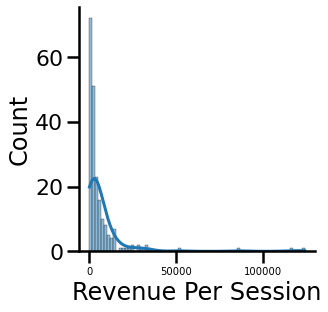

In [99]:
sns.set_context("poster", font_scale = 1, rc={"grid.linewidth": 5})
fig=plt.figure(figsize=(10,8))
fig=sns.displot(df.rev_per_sess,kde=True)
plt.xlabel('Revenue Per Session')
plt.xticks(fontsize=10)
fig.savefig('RevSess42.jpg')

In [84]:
print('recurring_users %age',df[df['New_Visitors']==0]['Sessions'].sum()/(df[df['New_Visitors']==0]['Sessions'].sum() + df[df['New_Visitors']==1]['Sessions'].sum()))
print('new_users %age',df[df['New_Visitors']==1]['Sessions'].sum()/(df[df['New_Visitors']==0]['Sessions'].sum() + df[df['New_Visitors']==1]['Sessions'].sum()))

recurring_users %age 0.6815906562847609
new_users %age 0.31840934371523916


In [87]:
df['views_per_session']=df['Page_Views']/df['Sessions']

C:\Users\suhai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



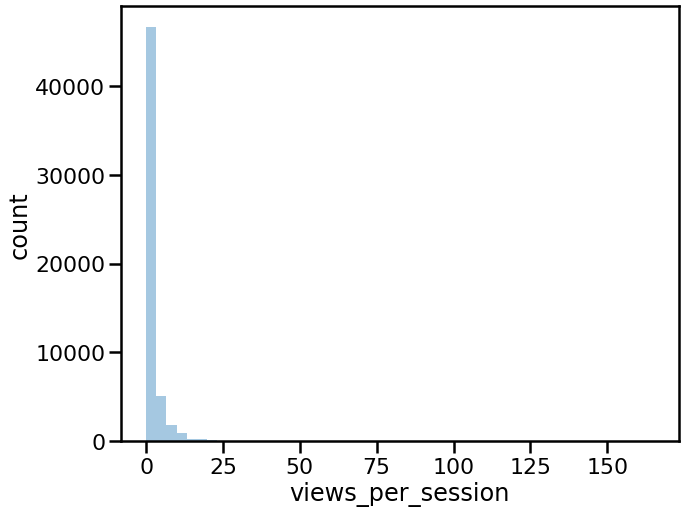

In [100]:
sns.set_context("poster", font_scale = 1, rc={"grid.linewidth": 5})
plt.figure(figsize=(10,8))
sns.distplot(df.views_per_session,kde=False)
plt.ylabel('count')
plt.savefig('views_per_sess42.jpg')

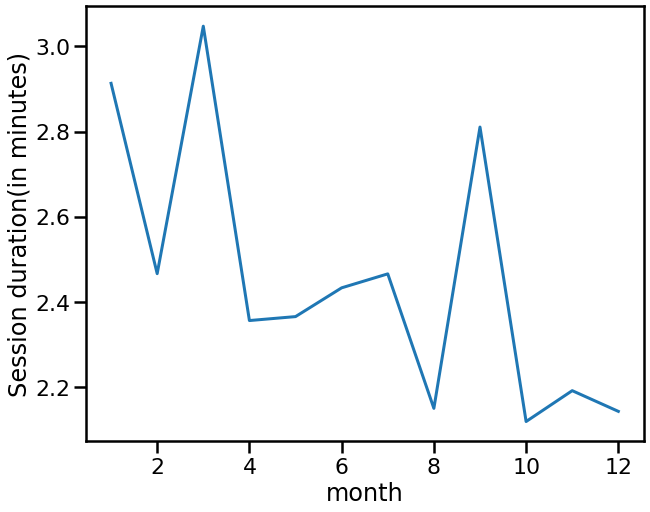

In [128]:
plt.figure(figsize=(10,8))
df['Avg_session_duration(minutes)'].mean().plot()
plt.savefig('avg_sess_month.jpg')

<AxesSubplot:xlabel='quarter_no.'>

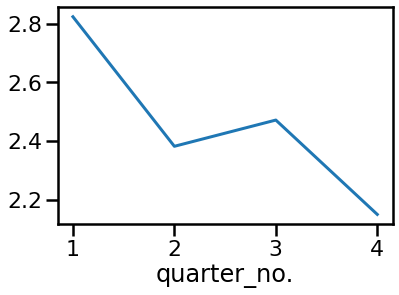

In [125]:
df.groupby('quarter_no.')['Avg_session_duration(minutes)'].mean().plot()

In [19]:
print('old',df[df['New_Visitors']==0]['bounces_offsite'].sum()/(df[df['New_Visitors']==0]['bounces_offsite'].sum()+df[df['New_Visitors']==1]['bounces_offsite'].sum()))
print('new',df[df['New_Visitors']==1]['bounces_offsite'].sum()/(df[df['New_Visitors']==0]['bounces_offsite'].sum()+df[df['New_Visitors']==1]['bounces_offsite'].sum()))

old 0.23171889838556506
new 0.768281101614435


In [24]:
print('Mobile users',df[df['is_mobile']==1].shape[0]/df.shape[0])
print('Non users',df[df['is_mobile']==0].shape[0]/df.shape[0])

Mobile users 0.3051766698499072
Non users 0.6948233301500928


In [27]:
df['geoLoc'].value_counts() /df.shape[0]

Hyderabad    0.255194
Bangalore    0.226418
Mumbai       0.146399
Pune         0.117534
Kolkata      0.051136
Delhi        0.051064
Chennai      0.050884
Jaipur       0.050740
Ahmedabad    0.050632
Name: geoLoc, dtype: float64

In [29]:
df.columns

Index(['date', 'Sessions', 'Page_Views', 'New_Visitors', 'Hits',
       'Time_onsite(minutes)', 'bounces_offsite', 'Revenue(Rs/.)',
       'Total_Revenues', 'is_direct', 'is_mobile', 'Session_qual',
       'Avg_session_duration(minutes)', 'Bounce_Rate(%age)',
       'Conversion_Rate(%age)', 'Channel', 'geoLoc', 'year', 'month', 'day'],
      dtype='object')

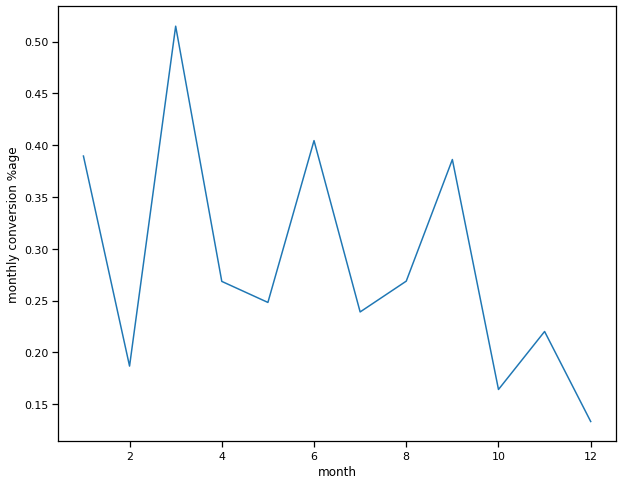

In [40]:
sns.set_context('notebook', font_scale = 1, rc=None)
plt.figure(figsize=(10,8))
df.groupby('month')['Conversion_Rate(%age)'].mean().plot()
plt.ylabel('monthly conversion %age')
plt.savefig('conversionMonthly.jpg')

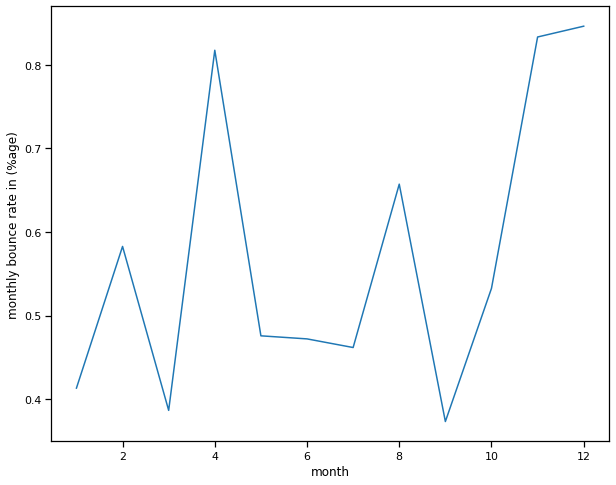

In [43]:
sns.set_context('notebook', font_scale = 1, rc=None)
plt.figure(figsize=(10,8))
df.groupby('month')['Bounce_Rate(%age)'].mean().plot()
plt.ylabel('monthly bounce rate in (%age)')
plt.savefig('bounceMonthly.jpg')

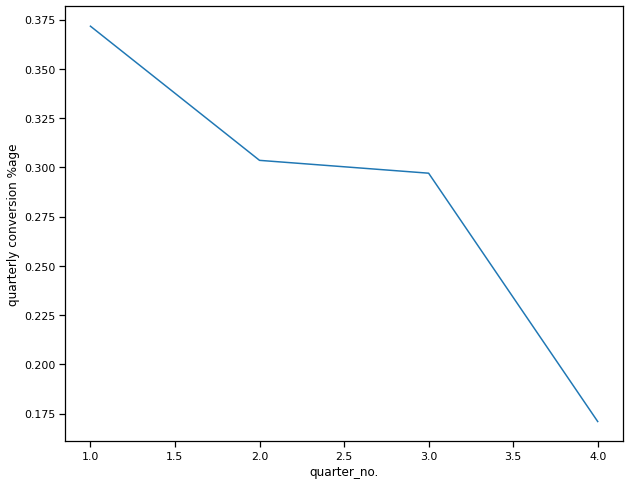

In [48]:
sns.set_context('notebook', font_scale = 1, rc=None)
plt.figure(figsize=(10,8))
df.groupby('quarter_no.')['Conversion_Rate(%age)'].mean().plot()
plt.ylabel('quarterly conversion %age')
plt.savefig('conversionQuarterly.jpg')

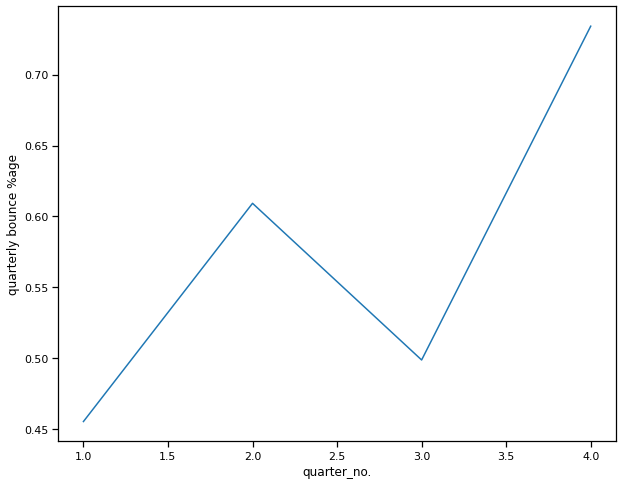

In [49]:
sns.set_context('notebook', font_scale = 1, rc=None)
plt.figure(figsize=(10,8))
df.groupby('quarter_no.')['Bounce_Rate(%age)'].mean().plot()
plt.ylabel('quarterly bounce %age')
plt.savefig('bounceQuarterly.jpg')

Time onsite metrics

C:\Users\suhai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


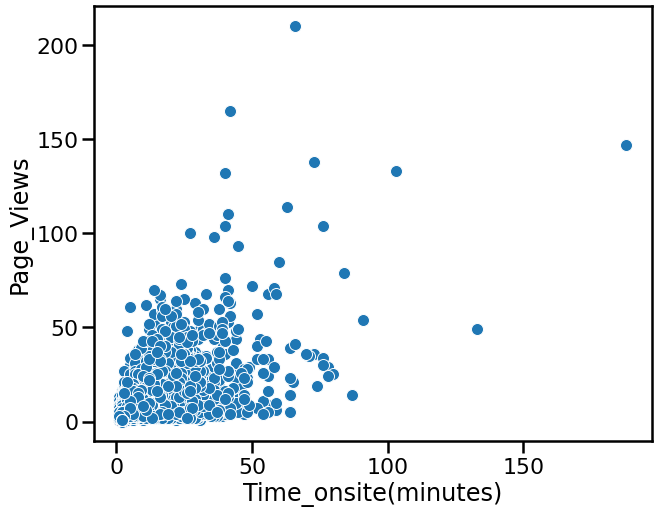

In [102]:
plt.figure(figsize=(10,8))
sns.set_context('poster', font_scale = 1, rc=None)
sns.scatterplot(df['Time_onsite(minutes)'],df['Page_Views'])
plt.savefig('timeViews.jpg')

C:\Users\suhai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


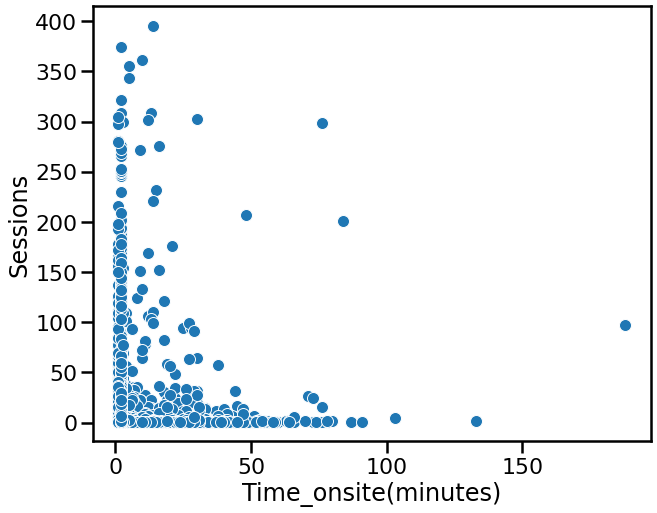

In [71]:
plt.figure(figsize=(10,8))
sns.scatterplot(df['Time_onsite(minutes)'],df['Sessions'])
plt.savefig('sessions.jpg')

C:\Users\suhai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


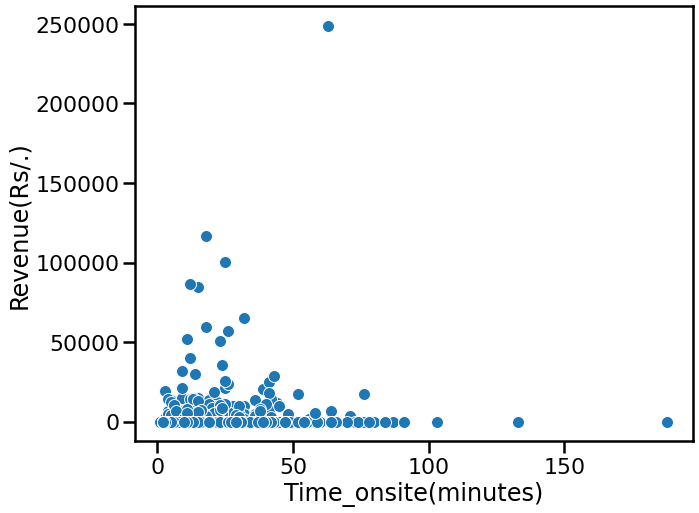

In [77]:
plt.figure(figsize=(10,8))
sns.scatterplot(df['Time_onsite(minutes)'],df['Revenue(Rs/.)'])
plt.savefig('rev.jpg')

Channels metrics

C:\Users\suhai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


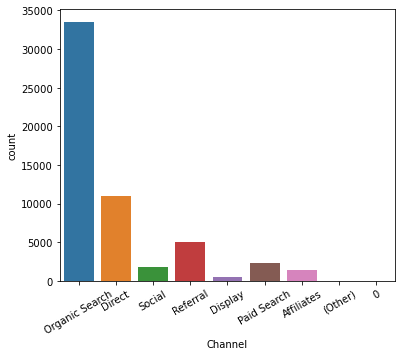

In [13]:
plt.figure(figsize=(6,5))
sns.countplot(df['Channel'])
plt.xticks(rotation=30)
plt.savefig('Channels24.jpg')

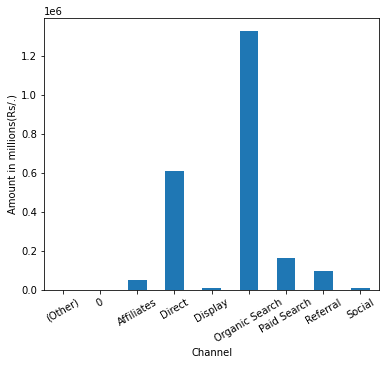

In [15]:
plt.figure(figsize=(6,5))
df.groupby('Channel')['Revenue(Rs/.)'].sum().plot(kind='bar')
plt.ylabel("Amount in millions(Rs/.)")
plt.xticks(rotation=30)
plt.savefig('channelRev24.jpg')

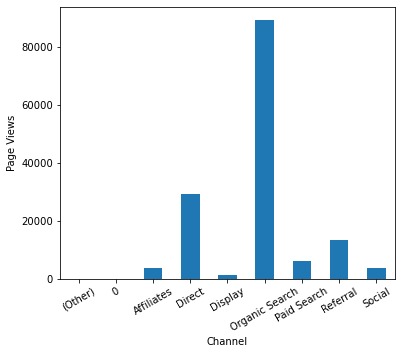

In [17]:
plt.figure(figsize=(6,5))
df.groupby('Channel')['Page_Views'].sum().plot(kind='bar')
plt.ylabel("Page Views")
plt.xticks(rotation=30)
plt.savefig('Pageviews24.jpg')

In [18]:
import plotly.express as px

C:\Users\suhai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



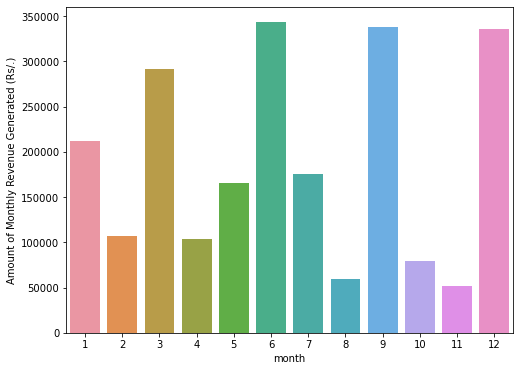

In [23]:
plt.figure(figsize=(8,6))
df_monthly=df.groupby('month')['Revenue(Rs/.)'].sum()
sns.barplot(df_monthly.index,df_monthly.values)
plt.ylabel('Amount of Monthly Revenue Generated (Rs/.)')
plt.savefig('revMonth.jpg')

C:\Users\suhai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



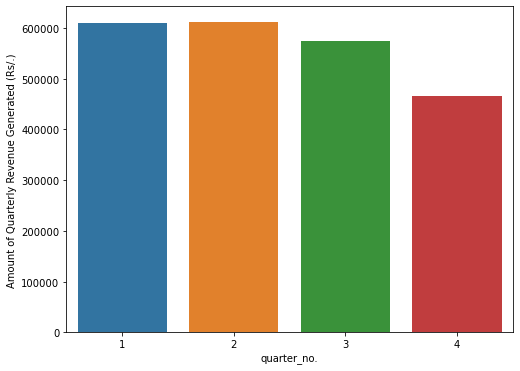

In [26]:
plt.figure(figsize=(8,6))
df_quarterly=df.groupby('quarter_no.')['Revenue(Rs/.)'].sum()
sns.barplot(df_quarterly.index,df_quarterly.values)
plt.ylabel('Amount of Quarterly Revenue Generated (Rs/.)')
plt.savefig('revQuarter.jpg')

C:\Users\suhai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



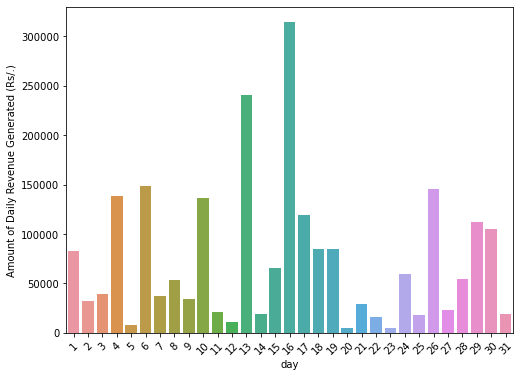

In [34]:
plt.figure(figsize=(8,6))
df_daily=df.groupby('day')['Revenue(Rs/.)'].sum()
sns.barplot(df_daily.index,df_daily.values)
plt.xticks(rotation=45)
plt.ylabel('Amount of Daily Revenue Generated (Rs/.)')
plt.savefig('revDaily.jpg')